In [1]:
import pandas as pd
data = pd.read_excel(r'C:\Users\Muthumanimaran\Dropbox\Jupyter Notebooks 2\voigt_psd.xlsx')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.optimize import curve_fit, leastsq
from scipy.optimize import least_squares
from scipy.signal import deconvolve
from scipy.special import wofz
from scipy.special import voigt_profile
from lmfit.models import VoigtModel
from scipy.stats import norm
from scipy import signal
import csv
import math
from scipy.interpolate import interp1d

In [3]:
df = pd.DataFrame(data)
print(df)

            freq  noisy_psd_values
0    -10000.0000      2.713003e-12
1     -9997.9998      8.804310e-13
2     -9995.9996      2.469929e-12
3     -9993.9994     -1.056176e-13
4     -9991.9992      2.270414e-12
...          ...               ...
9995   9991.9992      2.451259e-12
9996   9993.9994      1.535828e-12
9997   9995.9996      3.068483e-12
9998   9997.9998      6.999995e-13
9999  10000.0000      9.668475e-13

[10000 rows x 2 columns]


In [12]:
def find_middle_value(data):
    # Step 1: Sort the dataset in ascending order
    sorted_data = sorted(data)
    
    # Step 2: Calculate the middle index
    middle_index = len(sorted_data) // 2
    
    # Step 3: If the dataset has an odd number of values, return the middle value
    if len(sorted_data) % 2 == 1:
        middle_value = sorted_data[middle_index]
        return middle_value
    # Step 4: If the dataset has an even number of values, return the two middle values
    else:
        middle_values = [sorted_data[middle_index - 1], sorted_data[middle_index]]
        return middle_values

ydata = df.noisy_psd_values
xdata = df.freq


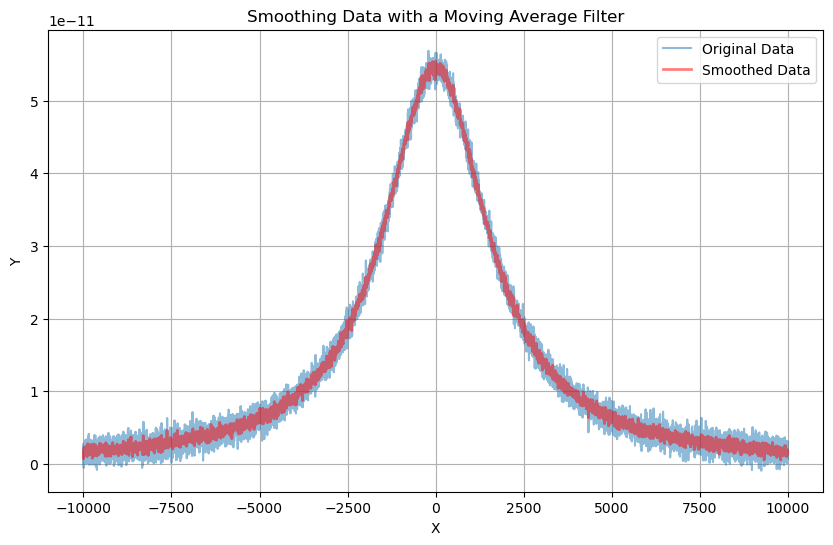

In [13]:
# Sample data (replace with your own data)
x = xdata
y = ydata  # Adding some noise

# Define the window size for the moving average filter
window_size = 5

# Apply the moving average filter to smooth the data
smoothed_y = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Create a time array for the smoothed data
smoothed_x = x[:len(smoothed_y)]

# Plot the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data', alpha=0.5)
plt.plot(smoothed_x, smoothed_y, label='Smoothed Data', color='red', linewidth=2, alpha = 0.5)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smoothing Data with a Moving Average Filter')
plt.grid(True)
plt.show()

In [14]:
x = smoothed_x
y = smoothed_y
x_data = x
y_data = y

In [15]:
def voigt(x, A, gamma, sigma):
    """
    Voigt profile function.
    
    Parameters:
    - x: Input data (frequency)
    - A: Amplitude
    - gamma: Lorentzian (gamma) parameter
    - sigma: Gaussian (sigma) parameter
    """
    return A * (1/ (np.pi * sigma)) * (gamma / ((x - gamma) ** 2 + sigma ** 2))

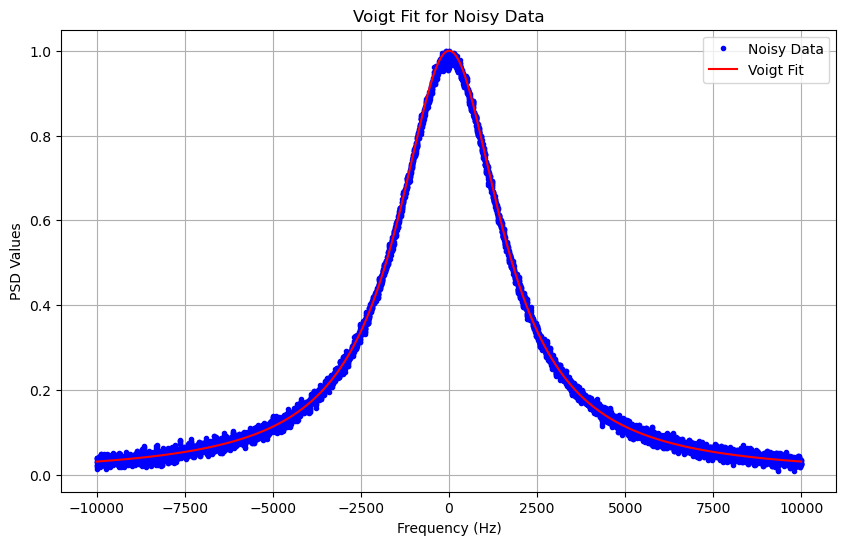

Fitted A: 1.0
The Linewidth is: 0.98 Hz
Fitted Sigma: 1789.0


In [21]:
# predicted values
gamma = 1
sigma = 1800
bounds = ([0, 0, 0],[np.inf, np.inf, np.inf])
# Perform the Voigt fit
params, covariance = curve_fit(voigt, x_data, y_data, p0=[1, gamma, sigma], bounds=bounds)

# Get the fitted parameters
A_fit, gamma_fit, sigma_fit = params

# Generate the fitted curve
y_fit = voigt(x_data, A_fit, gamma_fit, sigma_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data/max(y_data), 'b.', label='Noisy Data')
plt.plot(x_data, y_fit/max(y_fit), 'r-', label='Voigt Fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD Values')
plt.title('Voigt Fit for Noisy Data')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print("Fitted A:", A_fit)
print("The Linewidth is:", gamma_fit,"Hz")
print("Fitted Sigma:", sigma_fit)